In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, metrics,transform
import cv2

In [24]:

precisionTS=0
sensitivityTS=0
specificityTS=0
accuracyTS=0
for i in range(1,9):
    prediction = io.imread("../prediction"+str(i)+".png")
    gt = io.imread('../DRIVE/truth/0'+str(i)+'.png')
    gt = transform.resize(gt, prediction.shape, mode='constant', anti_aliasing=False)
    true_positive = np.count_nonzero(np.logical_and(gt, prediction))
    true_negative = np.count_nonzero(np.logical_and(~gt, ~prediction))
    false_positive = np.count_nonzero(np.logical_and(~gt, prediction))
    false_negative = np.count_nonzero(np.logical_and(gt, ~prediction))
    precision = true_positive / np.count_nonzero(prediction)
    sensitivity = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)
    accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive +
                                                  false_negative)
    precisionTS+=precision
    sensitivityTS+=sensitivity
    specificityTS+=specificity
    accuracyTS+=accuracy
 

In [26]:
precisionTS/8,sensitivityTS/8,specificityTS/8,accuracyTS/8

(0.6552802421231174,
 0.5106825487654852,
 0.9822371179690884,
 0.9528664080747414)

0.9198938521855189

/tmp/ipykernel_3523230/2511369379.py:1: UserWarning: Inputs have mismatched dtypes. Setting data_range based on im1.dtype.
  ssim_index = metrics.structural_similarity(prediction, gt)


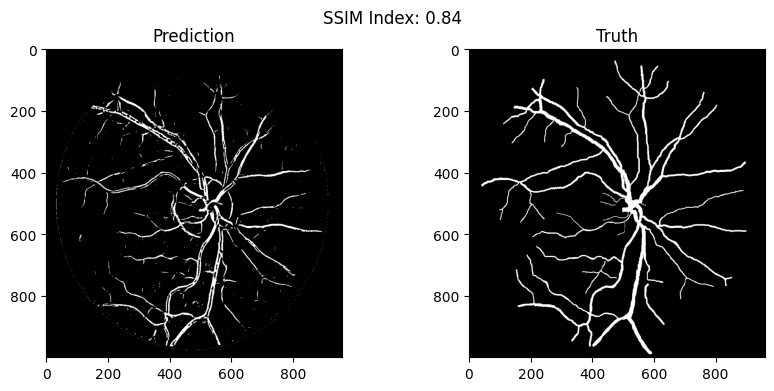

In [44]:
ssim_index = metrics.structural_similarity(prediction, gt)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.imshow(prediction, cmap='gray')
ax1.set_title('Prediction')

ax2.imshow(gt, cmap='gray')
ax2.set_title('Truth')

plt.suptitle(f'SSIM Index: {ssim_index:.2f}')
plt.show()

In [61]:
img1=cv2.imread("../prediction.png",cv2.IMREAD_GRAYSCALE)
img2=cv2.imread("../DRIVE/truth/01.png",cv2.IMREAD_GRAYSCALE)
img1.shape,(img2.T).shape


((999, 960), (999, 960))

In [62]:
def psnr(img1, img2):
    if img1.shape != img2.shape:
        raise ValueError("Input images must have the same size")

    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')  # Images are identical, PSNR is infinite
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

In [63]:
img1.shape,img2.shape    

((999, 960), (960, 999))

In [64]:
psnrvalue=psnr(img1,img2.T)

In [65]:
print(psnrvalue)

58.10367267067848
